# Testing routing pass with simple visualization
This notebook tests the routing pass with the features:
- Small coupling map
- Small circuit (GHZ without the H gate)
- No layout pass applied
    - This makes sure that the routing pass is only runnning one time each


In [1]:
from qiskit.transpiler.passes import SabreSwap as SabreSwap_v025
from qiskit.transpiler.passes.routing.sabre_swap_v020 import SabreSwap as SabreSwap_v020
from qiskit.transpiler.passes.routing.sabre_swap_v020_lookahead import SabreSwap as SabreSwap_v020_lookahead
from qiskit.transpiler.coupling import CouplingMap
from qiskit import QuantumCircuit
from qiskit.transpiler import PassManager
import random
import time
random.seed(42)


/Users/henryzou/Documents/GitHub/qiskit/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


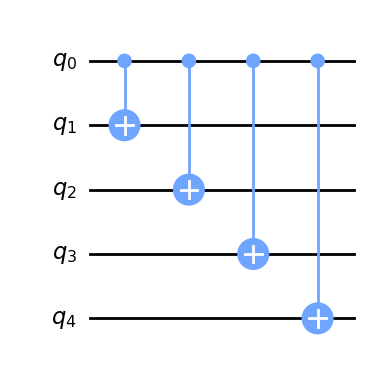

In [2]:
seed=42
cm = CouplingMap([[0,1], [1,2], [2,3], [3,4]])
# pass manager for Sabre v0.25
rp_v025 = SabreSwap_v025(cm, seed=seed)
pm_v025 = PassManager(rp_v025)

# pass manager for Sabre v0.20
rp_v020 = SabreSwap_v020(cm, seed=seed)
pm_v020 = PassManager(rp_v020)

# pass manager for Sabre v0.20 with lookahead
rp_v020_lookahead = SabreSwap_v020_lookahead(cm, seed=seed)
pm_v020_lookahead = PassManager(rp_v020_lookahead)

# creating the small circuit 
qc = QuantumCircuit(5)
qc.cx(0,1)
qc.cx(0,2)
qc.cx(0,3)
qc.cx(0,4)

qc.draw(output='mpl')

In [3]:
# Start timing the transpilation for v0.25
start_time = time.time()
qc_tr_25 = pm_v025.run(qc)
qc_tr_25 = qc_tr_25.decompose(["swap"])
duration_25 = time.time() - start_time

# Start timing the transpilation for v0.20
start_time = time.time()
qc_tr_20 = pm_v020.run(qc)
qc_tr_20 = qc_tr_20.decompose(["swap"])
duration_20 = time.time() - start_time

# Start timing the transpilation for v0.20 with lookahead
start_time = time.time()
qc_tr_20_lookahead = pm_v020_lookahead.run(qc)
qc_tr_20_lookahead = qc_tr_20_lookahead.decompose(["swap"])
duration_20_lookahead = time.time() - start_time

# Print the depth and duration for each transpilation
print(f"{'Depth of the circuit after transpiled v0.25:':<60}{qc_tr_25.depth():<10}{'Time taken:':<20}{duration_25:.5f} seconds")
print(f"{'Depth of the circuit after transpiled v0.20:':<60}{qc_tr_20.depth():<10}{'Time taken:':<20}{duration_20:.5f} seconds")
print(f"{'Depth of the circuit after transpiled v0.20 with lookahead:':<60}{qc_tr_20_lookahead.depth():<10}{'Time taken:':<20}{duration_20_lookahead:.5f} seconds")

Depth of the circuit after transpiled v0.25:                13        Time taken:         0.01515 seconds
Depth of the circuit after transpiled v0.20:                13        Time taken:         0.00224 seconds
Depth of the circuit after transpiled v0.20 with lookahead: 13        Time taken:         0.00310 seconds


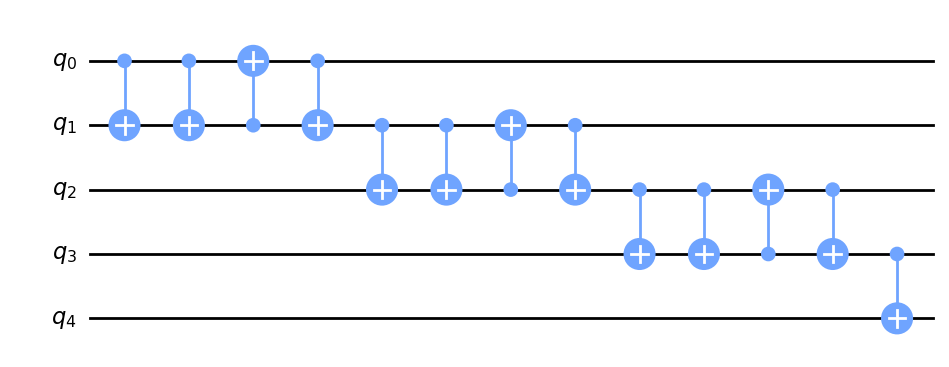

In [4]:
qc_tr_25.draw(output='mpl', idle_wires=False)

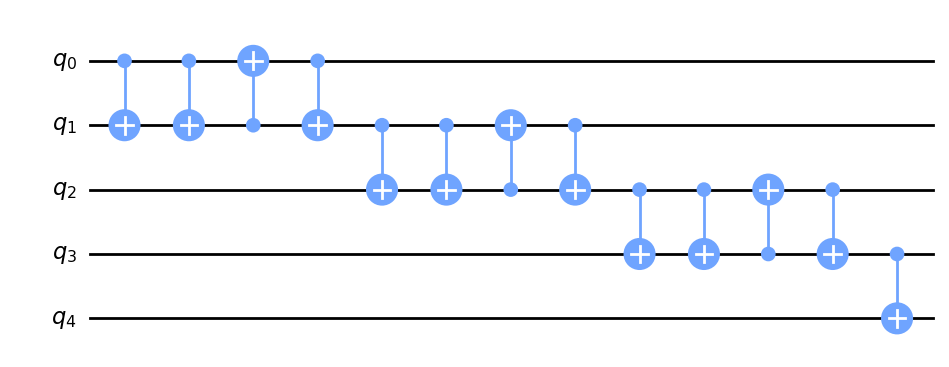

In [5]:
qc_tr_20.draw(output='mpl', idle_wires=False)

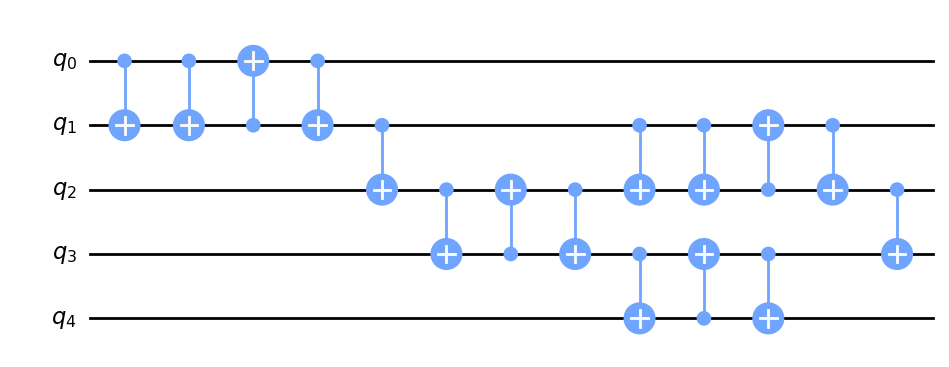

In [6]:
qc_tr_20_lookahead.draw(output='mpl', idle_wires=False)